<span style="font-size:16pt">
<p style="text-align: center;">
    МИНОБРНАУКИ РОССИИ <br>
    РГУ НЕФТИ И ГАЗА (НИУ) ИМЕНИ И.М. ГУБКИНА<br>
    ФАКУЛЬТЕТ АВТОМАТИКИ И ВЫЧИСЛИТЕЛЬНОЙ ТЕХНИКИ<br>
    КАФЕДРА АВТОМАТИЗИРОВАННЫХ СИСТЕМ УПРАВЛЕНИЯ<br>  <br>
    ДИСЦИПЛИНА <br>
        «Методы и модели оптимизации в автоматизированном управлении НГО»
    <br><br> <br> <br> <br> <br>
    ОТЧЁТ <br>
    по лабораторной работе №4 <br>
    «Численные методы решения задач математического программирования»<br> <br> <br> <br> <br>  <br><br> <br> <br> <br> <br> <br> <br> <br> <br>  <br><br> <br> <br> <br>
</p>

<p style="text-align: right;">
    Выполнил:<br>
    студент группы АС-21-05, Негробов В.А.<br>
    Вариант 14.<br>
    Проверила:<br>
    старший преподаватель, Степанкина О.А.<br><br> <br> <br> <br> <br><br> <br> <br> <br> <br> <br> <br>
</p> <br> <br> <br> <br>

<p style="text-align: center;">
    МОСКВА 2024
</p>
   </span>

Подключение библиотек:

In [384]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from functools import partial

# 1. Выбрать вариант задачи, соответствующий вашему номеру из списка группы.

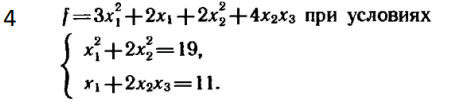

Целевая функция:

In [385]:
def f(x):
    x1, x2, x3 = x
    return 3 * x1**2 + 2 * x1 + 2 * x2**2 + 4 * x2 * x3

Ограничения:

In [386]:
def constraint1(x):
    x1, x2, x3 = x
    return x1**2 + 2 * x2**2 - 19

def constraint2(x):
    x1, x2, x3 = x
    return x1 + 2 * x2 * x3 - 11

# 2. Найти решение задачи средствами одного из математических пакетов.

Начальное приближение, ограничения:

In [387]:
x0 = [0, 3, 2]
cons = [{'type': 'eq', 'fun': constraint1},
        {'type': 'eq', 'fun': constraint2}]
bounds = [(None, None), (None, None), (None, None)]

Минимизация целевой функции:

In [388]:
solution = minimize(f, x0, method='trust-constr',
                    bounds=bounds, constraints=cons)
solution

C:\Users\vikto\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


         cg_niter: 24
     cg_stop_cond: 1
           constr: [array([0.]), array([0.]), array([0., 3., 2.])]
      constr_nfev: [72, 72, 0]
      constr_nhev: [0, 0, 0]
      constr_njev: [0, 0, 0]
   constr_penalty: 2.045871047611336
 constr_violation: 0.0
   execution_time: 0.09276366233825684
              fun: 41.000000000000014
             grad: array([ 2.00000095, 19.46657058, 12.32882813])
              jac: [array([[2.38418579e-07, 1.23288281e+01, 0.00000000e+00]]), array([[1.        , 3.56887123, 6.164414  ]]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])]
  lagrangian_grad: array([ 6.75797188e-07, -1.15463195e-14, -1.09628772e-07])
          message: '`xtol` termination condition is satisfied.'
           method: 'equality_constrained_sqp'
             nfev: 72
             nhev: 0
              nit: 26
            niter: 26
             njev: 18
       optimality: 6.757971884319147e-07
           status: 2
          success: True
        tr_radius: 1.641

Решение задачи минимизации

In [389]:
sp_x, sp_f = solution.x, solution.fun
solution.x, solution.fun

(array([9.23473756e-08, 3.08220700e+00, 1.78443562e+00]), 41.000000000000014)

# 3. Написать скрипты, реализующие:

## 3.2. Метод барьерных функций (четные номера).

Барьерная функция для ограничения типа равенство в виде $P(x, r) = r * \Sigma_{i} e^{|g_i(x)|}$:

In [390]:
def P(x, r=1):
    return r * (np.exp(abs(constraint1(x))) + np.exp(abs(constraint2(x))) - 2)

Гиперпараметры:

In [ ]:
r = 10
c = 10
tol = 1e-4

Решение задачи безусловной оптимизации с проверкой барьерной функции:

In [403]:
for i in range(20):
    F = lambda x: f(x) + P(x, r)
    solution = minimize(F, x0, method='Nelder-Mead',
                   options={'xatol': tol, 'disp': False})
    if P(solution.x) < tol:
        print(f'{P(solution.x) = }, {r = }')
        break
    else:
        r = r * c

P(solution.x) = 9.430638187701845e-06, r = 10


Результат решения задачи:

In [404]:
solution

 final_simplex: (array([[9.80011726e-05, 3.08220756e+00, 1.78441982e+00],
       [9.81943336e-05, 3.08220635e+00, 1.78441888e+00],
       [9.85412812e-05, 3.08220705e+00, 1.78442157e+00],
       [9.88013849e-05, 3.08220754e+00, 1.78441740e+00]]), array([41.00010629, 41.00013174, 41.00015145, 41.00016578]))
           fun: 41.00010629057491
       message: 'Optimization terminated successfully.'
          nfev: 110
           nit: 62
        status: 0
       success: True
             x: array([9.80011726e-05, 3.08220756e+00, 1.78441982e+00])

In [405]:
bf_x, bf_f = solution.x, f(solution.x)
solution.x, f(solution.x)

(array([9.80011726e-05, 3.08220756e+00, 1.78441982e+00]), 41.00001198419304)

## 3.3. Метод проекции градиента

Нахождение градиентов ограничений:

In [406]:
def get_a_matrix(x):
    x1, x2, x3 = x
    return np.array([
        [2 * x1, 4 * x2, 0],
        [1, 2 * x3, 2 * x2]
    ])

Вектор значения ограничений:

In [407]:
def get_tau_vector(x):
    return - np.array(
        [constraint1(x), constraint2(x)]
    )

Градиент функции:

In [408]:
def get_f_grad(x):
    x1, x2, x3 = x
    return np.array(
        [6 * x1 + 2, 4 * x2 + 4 * x3, 4 * x2]
    )

Расчёт чисел Фибонначи:

In [409]:
def fibonacci_numbers(max_value):

    num1, num2 = 1, 1
    
    yield num1
    
    if num1 > max_value and  num2 > max_value:
        return

    if num1 < max_value and num2 > max_value:
        yield num2

    while num2 < max_value:
        num1, num2 = num2, num1 + num2
        yield num2

Функция одномерной минимизации Фибонначи:

In [410]:
def fibonacci_method(func, a, b, interval_length, eps, callback=None):
    
    if callback is None:
        callback = lambda c, v: 0
        
    max_value = (b - a) / interval_length
    fib_nums = [num for num in fibonacci_numbers(max_value)]
    length = len(fib_nums) - 1
    y = a + fib_nums[length - 2] / fib_nums[length] * (b - a)
    z = a + fib_nums[length - 1] / fib_nums[length] * (b - a)
    k = 1
    max_k = length - 3
    
    func_y, func_z = func(y), func(z)
    
    for k in range(max_k + 1):        
        if func_y <= func_z:
            less = True
            b, z = z, y
            y = a + fib_nums[length - k - 3] / fib_nums[length - k - 1] * (b - a)
            callback(b, func_z)
        else:
            less = False
            a, y = y, z
            z = a + fib_nums[length - k - 2] / fib_nums[length - k - 1] * (b - a)
            callback(a, func_y)
        func_y, func_z = (func(y), func_y) if less else (func_z, func(z))
        
    y = z
    z = y + eps
    x = (a + z) / 2 if func_y <= func(z) else (y + b) / 2
    callback(x, func(x))
    return x, max_k + 1

Методи проекции градинета:

In [411]:
def gradient_projection_method(f, x, t=1,
                               lr_min=1e-7, lr_max=1,
                               eps=1e-4, max_iter=10_000):
    
    def fi(t, x, d):
        nonlocal f
        return f(x + t * d)
    
    fib_k = 0
    
    for i in range(max_iter):
        A = get_a_matrix(x)
        tau = get_tau_vector(x)
        delta2x = A.T @ np.linalg.inv(A @ A.T) @ tau
        delta2x_norm = np.linalg.norm(delta2x)
        grad_f = get_f_grad(x)
        delta_x = - (np.eye(A.shape[1]) - A.T @ np.linalg.inv(A @ A.T) @ A) @ grad_f
        
        first, second = np.linalg.norm(delta_x) < eps, np.linalg.norm(delta2x_norm) < eps
        
        if first and second:
            print(fib_k)
            return x, i
        elif not first and second:
            delta2x_norm = 0
        elif first and not second:
            delta_x = 0
        if not first:
            fi_x_d = partial(fi, x=x, d=delta_x)
            t, fc = fibonacci_method(fi_x_d, lr_min, lr_max, 0.07, 0.2)
            fib_k += fc
        
        x = x + t * delta_x + delta2x
    print(fib_k)
    return x, max_iter

Решение задачи минимизации:

In [412]:
x, it = gradient_projection_method(f, np.array(x0))

12


In [413]:
gp_x, gp_f = x, f(x)
x, f(x)

(array([-2.07931243e-06,  3.08220700e+00,  1.78443597e+00]), 41.00000000137163)

# 4. Сформулировать выводы об эффективности методов

Результаты работы методов:

In [414]:
tol = 5
data = {
    "Method": ["trust-constr", "Barrier function + Nelder-Meadn", "Gradient Projection"],
    "Solution [x1, x2, x3]": [np.round(sp_x, tol), np.round(bf_x, tol), np.round(gp_x, tol)],
    "Function Value": [round(sp_f, tol), round(bf_f, tol), round(gp_f, tol)],
    "Iterations": [26, 62, str(it) + ' + 12']
}

pd.DataFrame(data)

,Method,"Solution [x1, x2, x3]",Function Value,Iterations
0,trust-constr,"[0.0, 3.08221, 1.78444]",41.00000,26
1,Barrier function + Nelder-Meadn,"[0.0001, 3.08221, 1.78442]",41.00001,62
2,Gradient Projection,"[-0.0, 3.08221, 1.78444]",41.00000,4 + 12


Вывод:

Метод Trust-Region (trst-constr) является наиболее удобным в использовании, потому что он является встроенным методом библиотеки SciPy. Также его удобство обуславливается простотой ввода ограничений. Для минимизации целевой функции ему потребовалось 26 итераций, что является средним по количеству среди остальных методов. Этот метод является наиболее предпочтительным для решения базовых задач.

Метод штрафных функций с использованием для минимизации метода Нелдера — Мида наиболее сложен в реализации, так как требует изобретательности при выборе штрафных функций и выборе значений гиперпараметров. Конечно, возможен итеративный подбор гиперпарметров, но, даже при выборе их оптимальных значений, он совершил наибольшее количество итераций. Данный метод, как мне кажется, является самым неэффективным.

Метод проекции градиентов является методом наискорейшего спуска, отличающегося в реализации тем, что градиент целевой функции проецируется на область ограничений. При его написании необходим ввод метода одномерной оптимизации и нахождение различных частных производных, что замедляет процесс реализации. Подбор гиперпарметров является относительно непростой задачей, так как необходимо выбрать точность нахождения скорости обучения не слишком высокой, но и не слишком низкой. В любом случае, для нахождения минимума этому методу потребовалось совершить минимальное количество итераций. Метод является оптимальным для минимизации сложный функций.
